# Quick Start

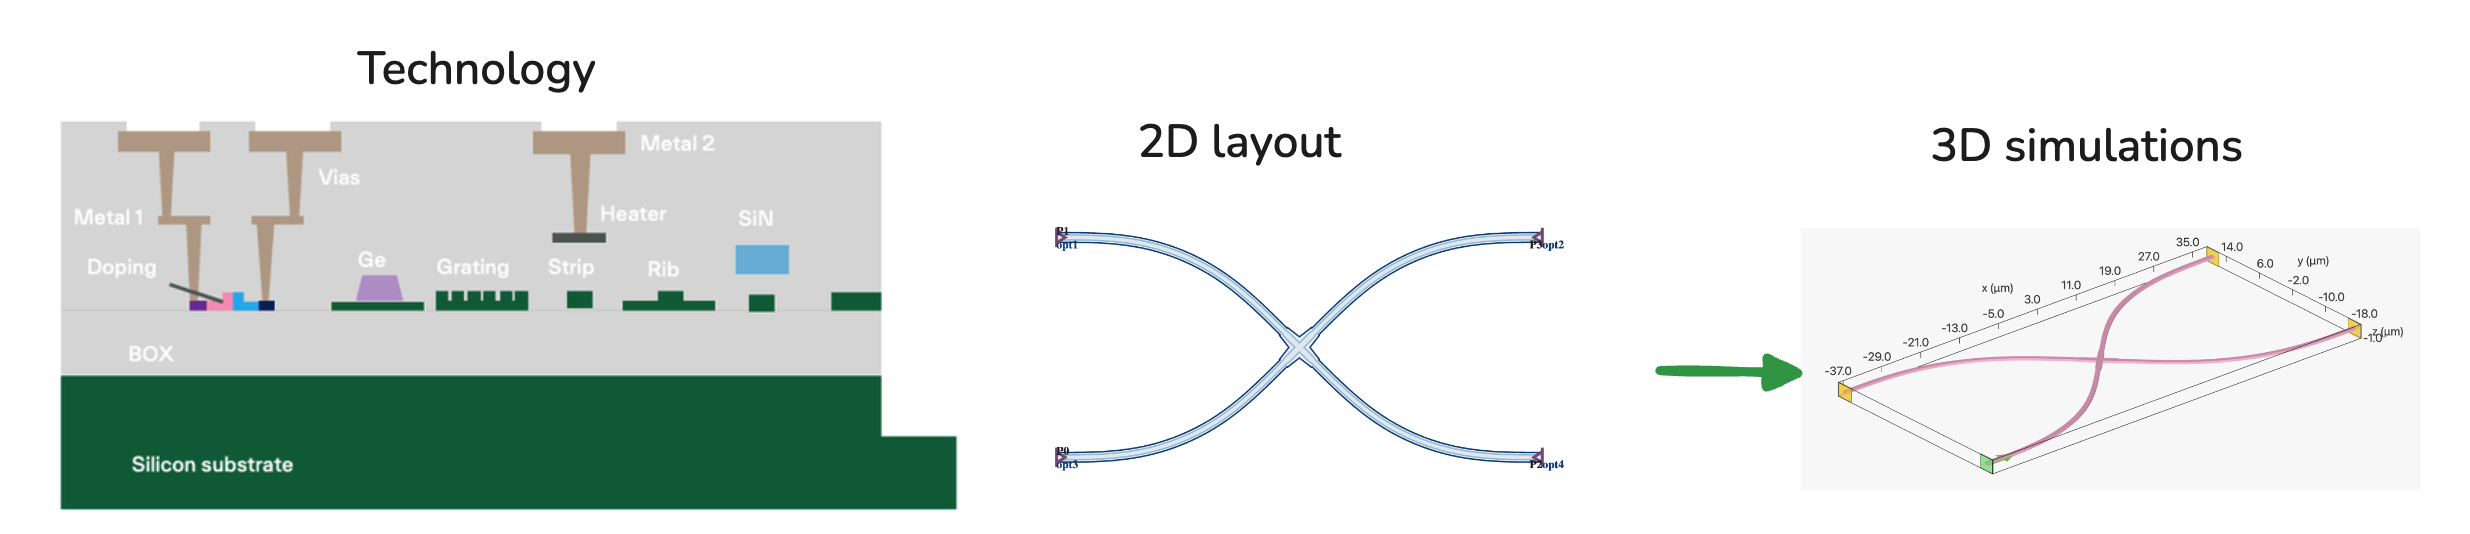

In this quick start, we will show you how to:

- Load a foundry Process Design Kit (PDK) in PhotonForge
- Load PDK components
- Run FDTD simulation by converting 2D layout files to 3D for electromagnetic simulations in a single line of code

## Step 1: Loading a Foundry PDK

Start by importing numpy, photonforge, and siepic pdk library

In [1]:
import numpy as np
import photonforge as pf
import siepic_forge as siepic_pdk

Select the open source ebeam process node, also called the technology stack

In [2]:
# load the technology and set is as the default
technology = siepic_pdk.ebeam()
pf.config.default_technology = technology

In [3]:
technology

Name: SiEPIC EBeam
Version: 0.4.32

Layers:
        Name          Layer    Description    Color    Pattern
--------------------------------------------------------------
Si                    (1, 0)   Waveguides   #ff80a818     \\  
PinRec               (1, 10)   SiEPIC       #00408018     /   
PinRecM              (1, 11)   SiEPIC       #00408018     /   
Si_Litho193nm        (1, 69)   Waveguides   #cc80a818     \   
Waveguide            (1, 99)   Waveguides   #ff80a818     \   
Si slab               (2, 0)   Waveguides   #80a8ff18     /   
SiN                   (4, 0)   Waveguides   #a6cee318     \\  
Oxide open (to BOX)   (6, 0)   Waveguides   #ffae0018     \   
Text                 (10, 0)                #0000ff18     \   
M1_heater            (11, 0)   Metal        #ebc63418     xx  
M2_router            (12, 0)   Metal        #90857018     xx  
M_Open               (13, 0)   Metal        #3471eb18     xx  
Si N                 (20, 0)   Doping       #7000ff18     \\  
Si N++               (24, 0)   Doping       #0000ff18     :   
VC                   (40, 0)   Metal        #3a027f18     xx  
DevRec               (68, 0)   SiEPIC       #00408018   hollow
FbrTgt               (81, 0)   SiEPIC       #00408018     /   
FloorPlan            (99, 0)   Misc         #8000ff18   hollow
SEM                  (200, 0)  Misc         #ff00ff18     \   
Deep Trench          (201, 0)  Misc         #c0c0c018   solid 
Keep out             (202, 0)  Misc         #a0a0c018     //  
Isolation Trench     (203, 0)  Misc         #c0c0c018   solid 
Dicing               (210, 0)  Misc         #a0a0c018   solid 
Chip design area     (290, 0)  Misc         #80005718   hollow
FDTD                 (733, 0)  SiEPIC       #80005718   hollow
BlackBox             (998, 0)  SiEPIC       #00408018   solid 
Errors               (999, 0)  SiEPIC       #00008018     /   

Extrusion Specs:
#                Mask                Limits (μm)  Sidewal (°)            Opt. Medium                       Elec. Medium          
---------------------------------------------------------------------------------------------------------------------------------
0  'Oxide open (to BOX)'                0, inf         0       Medium(permittivity=1.0)          Medium(permittivity=1.0)        
1  'Si'                                0, 0.22         0       PoleResidue(eps_inf=1.0, freque…  Si                              
2  'Si slab'                           0, 0.09         0       PoleResidue(eps_inf=1.0, freque…  Si                              
3  'SiN'                                0, 0.4         0       PoleResidue(eps_inf=3.031225983…  Si3N4                           
4  'M2_router' + 'M1_heater'          2.42, 2.62       0       PoleResidue(eps_inf=1.0, freque…  LossyMetalMedium(fit_param={'at…
5  'M2_router'                        2.62, 3.02       0       PoleResidue(eps_inf=1.0, freque…  LossyMetalMedium(fit_param={'at…
6  'M_Open'                           3.02, inf        0       Medium(permittivity=1.0)          Medium(permittivity=1.0)        
7  'Deep Trench' + 'Isolation Tren…   -inf, inf        0       Medium(permittivity=1.0)          Medium(permittivity=1.0)        

Ports:
        Name         Classification            Description             Width (μm)  Limits (μm)  Radius (μm)    Modes     Target n_eff         Path profiles (μm)         Voltage path  Current path
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
MM_SiN_TE_1550_3000     optical      Multimode SiN Strip TE 1550 nm,…      8        -2.5, 2.9        0           7           2.1       'SiN': 3                                                    
MM_TE_1550_2000         optical      Multimode Strip TE 1550 nm, w=2…      6         -2, 2.22        0           12          3.5       'Si': 2                                                     
MM_TE_1550_3000    

In [4]:
technology.random_variables

[RandomVariable('si_thickness', **{'value': 0.22, 'stdev': 0.0037166666666666667}),
 RandomVariable('bottom_oxide_thickness', **{'value': 3.017, 'stdev': 0.001})]

## Step 2: Loading foundry provided PDK components

In [5]:
cross = siepic_pdk.component("crossing_horizontal")
cross

In [6]:
cross.models

{'Tidy3D': Tidy3DModel(run_time=None, medium=None, symmetry=(0, 0, 0), boundary_spec=None, monitors=(), structures=(), grid_spec=None, shutoff=None, subpixel=None, courant=None, port_symmetries=[('P0', 'P1', {'P1': 'P0', 'P2': 'P3', 'P3': 'P2'}), ('P0', 'P2', {'P1': 'P3', 'P2': 'P0', 'P3': 'P1'}), ('P0', 'P3', {'P1': 'P2', 'P2': 'P1', 'P3': 'P0'})], bounds=((None, None, None), (None, None, None)), source_gap=None, simulation_updates={}, verbose=True)}

## Step 3: Covert 2D layout files to 3D for electromagnetic simulations

In [7]:
# run 3D fdtd simulation to compute s_matrix
wavelengths = np.linspace(1.535, 1.565, 20)
s_matrix = cross.s_matrix(frequencies = pf.C_0/wavelengths)

Uploading task 'P0@0'…
Starting task 'P0@0': https://tidy3d.simulation.cloud/workbench?taskId=fdve-1965712a-d4a8-4f1b-b9cf-9ccf066d4308
Progress: 100% 


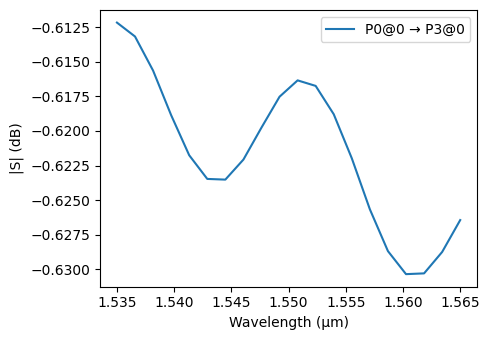

In [8]:
plt = pf.plot_s_matrix(s_matrix, y="dB", input_ports= ["P0"], output_ports = ["P3"])